<a href="https://colab.research.google.com/github/AnaRaquelCafe/PyTorch/blob/main/Deep_Learning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendendo com PyTorch** 🤖

https://pytorch.org/docs/stable/index.html

In [2]:
import torch
import numpy as np

# **Conhecendo os Tensores**

Tensor é um array multimensional, muito parecido com os array do numpy, porém, mais poderosos!


In [3]:
tendor_2d = torch.randn(3,4)
tendor_2d

tensor([[ 0.0349, -0.1639, -1.0486, -1.1963],
        [ 2.3468, -0.0589, -2.0127, -1.1390],
        [-0.6948, -0.3135,  0.7091, -1.7653]])

In [7]:
tendor_3d = torch.randn(2,3,4)
tendor_3d

tensor([[[-1.0605, -0.3042,  1.7612,  0.1269],
         [ 0.2756,  0.8139,  0.2368,  0.6759],
         [-0.5488,  1.4741, -0.1417,  0.1295]],

        [[-0.7735,  0.6594,  0.1157,  0.2409],
         [-0.7762, -0.7047, -1.2413,  0.3605],
         [ 0.7618,  0.6456,  0.8827, -2.0287]]])

#**Operações com Tensores - Reshape and Slice**

In [8]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# reshape
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [11]:
# reshape para caso não conheça o volume total de dados no tensor, utilizamos o -1
my_torch_2 = torch.arange(10)
my_torch_2 = my_torch_2.reshape(2,-1)
my_torch_2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [17]:
my_torch_3 = torch.arange(10)
my_torch_3 = my_torch_3.reshape(-1,5)
my_torch_3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [24]:
# Utilizando view

my_torch_4 = torch.arange(10)
my_torch_4 = my_torch_4.view(2,5)
my_torch_4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [29]:
my_torch_5 = my_torch_4.reshape(2,5)
my_torch_5

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [30]:
my_torch_4[1] = 20
my_torch_4

tensor([[ 0,  1,  2,  3,  4],
        [20, 20, 20, 20, 20]])

In [31]:
my_torch_5

tensor([[ 0,  1,  2,  3,  4],
        [20, 20, 20, 20, 20]])

O que você altera em um tensor com reshape ou com view, altera todos os tensores originais.

In [32]:
# Slices
my_torch_7 = torch.arange(10)
my_torch_7

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
my_torch_7[7] #trazendo a posição 7

tensor(7)

In [34]:
my_torch_8 = my_torch_7.reshape(5,2)
my_torch_8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [35]:
my_torch_8[:,1] # tarzendo todos os dados desde a coluna 1

tensor([1, 3, 5, 7, 9])

In [36]:
my_torch_8[:,1:] #para manter a coluna

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

# **Operações matemáticas com tensores**

Podemos fazer algumas operações tais como: adição, subtração, multiplicação e divisão.

In [37]:
# adição
tensor_a = torch.tensor([1, 2, 3, 4])
tensor_b = torch.tensor([5, 6, 7, 8])

In [38]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [39]:
torch.add(tensor_a, tensor_b) # faz o mesmo trabalho que a adição manual

tensor([ 6,  8, 10, 12])

In [47]:
tensor_a.add_(tensor_b) # faz o mesmo trabalho que a adição manual

tensor([ 6,  8, 10, 12])

In [41]:
# Subtração
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [42]:
torch.sub(tensor_b, tensor_a)  # faz o mesmo trabalho que a subtração manual

tensor([4, 4, 4, 4])

In [43]:
# Multiplicação
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [44]:
torch.mul(tensor_a, tensor_b)  # faz o mesmo trabalho que a subtração manual

tensor([ 5, 12, 21, 32])

In [45]:
# Divisão
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [46]:
torch.div(tensor_b, tensor_a)  # faz o mesmo trabalho que a divisão manual

tensor([5.0000, 3.0000, 2.3333, 2.0000])

# **Criando um modelo de deep learning com PyTorch**

Vamos criar um mdodelo de deep learning na clássica base de dados das flores Iris. 💐

Base de dados: https://archive.ics.uci.edu/dataset/53/iris



In [49]:
import torch.nn as nn
import torch.nn.functional  as F

In [50]:
# Definir a arquitetura da rede neural
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=4, output_features=3):
        super().__init__() # instancia o modelo
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [52]:
# Configurando uma semente aleatória nos dados
torch.manual_seed(42)

# Instancianco o modelo
model = Model()

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Carregando os dados
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [73]:
# Tornando as colunas da target em formato numérico
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [74]:
# Separando os dados em treino e teste

X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [75]:
# Convertendo para numpy arrays

X = X.values
y = y.values

In [61]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Convertendo os valores de X para tensores

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [78]:
# Convertendo as targets para tensores

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [85]:
learning_rate = 0.01

criterion = nn.CrossEntropyLoss() # Mensurando o erro
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Escolhendo o otimizador

In [86]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)>

In [87]:
# Treinando o modelo

epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  # Mensurando os erros
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  # print epocas de processsamento:
  if i % 10 == 0:
    print(f'Epoch: {i} erro: {loss}')

  # Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 erro: 1.0958234071731567
Epoch: 10 erro: 0.9564146399497986
Epoch: 20 erro: 0.7526928186416626
Epoch: 30 erro: 0.57756507396698
Epoch: 40 erro: 0.47656840085983276
Epoch: 50 erro: 0.40413162112236023
Epoch: 60 erro: 0.3201034963130951
Epoch: 70 erro: 0.2216917872428894
Epoch: 80 erro: 0.1405438780784607
Epoch: 90 erro: 0.09807074815034866


Text(0.5, 0, 'Epochs')

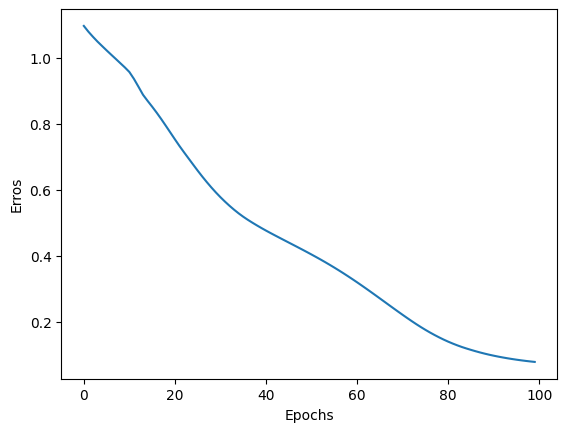

In [88]:
plt.plot(range(epochs), losses)
plt.ylabel('Erros')
plt.xlabel('Epochs')